In [209]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [179]:
pd.set_option('max_columns',30)


In [180]:
from sklearn.linear_model import LinearRegression

In [202]:
data=pd.read_csv('lianjia.csv',encoding='gbk')
data=data.iloc[0:1000,2:27]
data.dropna(axis=0,how='any',inplace=True)
#data=data.loc[data['District']=='朝阳']
data

,ID,Lng,Lat,CommunityID,TradeTime,DOM,Followers,Total price,Price,Square,Bed Room,Living room,Kitchen,Bathroom,楼,Building Type,Construction time,renovation condition,building structure,Ladder ratio(梯户比),Elevator,Property rights for five years（房屋满五年）,Subway,District,Community average
0,1.010848e+11,116.475489,40.019520,1.111027e+12,2016/8/9,1464.0,106.0,415.0,31680.0,131.00,2.0,1.0,1.0,1.0,高 26,塔楼,2005,简装,钢混,0.217,1.0,0.0,1.0,朝阳,56021.0
1,1.010860e+11,116.453917,39.881534,1.111027e+12,2016/7/28,903.0,126.0,575.0,43436.0,132.38,2.0,2.0,1.0,2.0,高 22,塔楼,2004,精装,钢混,0.667,1.0,1.0,0.0,朝阳,71539.0
2,1.010860e+11,116.561978,39.877145,1.111041e+12,2016/12/11,1271.0,48.0,1030.0,52021.0,198.00,3.0,2.0,1.0,3.0,中 4,板楼,2005,简装,钢混,0.500,1.0,0.0,0.0,朝阳,48160.0
3,1.010864e+11,116.438010,40.076114,1.111043e+12,2016/9/30,965.0,138.0,297.5,22202.0,134.00,3.0,1.0,1.0,1.0,底 21,塔楼,2008,其他,钢混,0.273,1.0,0.0,0.0,昌平,51238.0
4,1.010869e+11,116.428392,39.886229,1.111027e+12,2016/8/28,927.0,286.0,392.0,48396.0,81.00,2.0,1.0,1.0,1.0,中 6,板楼,1960,毛坯,混合,0.333,0.0,1.0,1.0,东城,62588.0
5,1.010873e+11,116.466280,39.991363,1.111027e+12,2016/7/22,861.0,57.0,275.6,52000.0,53.00,1.0,0.0,1.0,1.0,中 8,板楼,2005,简装,钢混,0.333,1.0,1.0,0.0,朝阳,67738.0
6,1.010873e+11,116.482586,39.891991,1.111027e+12,2016/7/14,851.0,167.0,275.0,37672.0,73.00,2.0,1.0,1.0,1.0,高 6,板楼,1997,精装,混合,0.500,0.0,0.0,0.0,朝阳,50112.0
7,1.010870e+11,116.453917,39.881534,1.111027e+12,2016/9/7,904.0,138.0,800.0,49521.0,161.55,3.0,2.0,1.0,2.0,高 22,塔楼,2004,精装,钢混,0.667,1.0,1.0,0.0,朝阳,71539.0
8,1.010875e+11,116.555729,40.162058,1.111027e+12,2016/9/4,873.0,218.0,134.0,27917.0,48.00,1.0,0.0,1.0,1.0,高 10,板塔结合,2009,其他,混合,0.333,0.0,0.0,0.0,顺义,44235.0
9,1.010880e+11,116.453086,39.898397,1.111027e+12,2016/9/5,865.0,134.0,380.0,55883.0,68.00,1.0,0.0,0.0,0.0,中 23,塔楼,2009,精装,钢混,0.308,1.0,1.0,1.0,东城,78590.0


In [248]:
yearunknown=[]
for row in data.iterrows():
    data.loc[row[0],'TradeTime']=pd.to_datetime(data.loc[row[0],'TradeTime'])
    #data.loc[row[0],'District']=dist_dict[data.loc[row[0],'District']]
    try:
        int(data.loc[row[0],'Construction time'])
    except:
        yearunknown.append(row[0])
data.drop(yearunknown,inplace=True)

In [249]:
data.to_csv('littledata.csv',index=None)
litdata=pd.read_csv('littledata.csv')
litdata

,ID,Lng,Lat,CommunityID,TradeTime,DOM,Followers,Total price,Price,Square,Bed Room,Living room,Kitchen,Bathroom,楼,Building Type,Construction time,renovation condition,building structure,Ladder ratio(梯户比),Elevator,Property rights for five years（房屋满五年）,Subway,District,Community average
0,1.010848e+11,116.475489,40.019520,1.111027e+12,2016-08-09 00:00:00,1464.0,106.0,415.0,31680.0,131.00,2.0,1.0,1.0,1.0,高 26,塔楼,2005,简装,钢混,0.217,1.0,0.0,1.0,朝阳,56021.0
1,1.010860e+11,116.453917,39.881534,1.111027e+12,2016-07-28 00:00:00,903.0,126.0,575.0,43436.0,132.38,2.0,2.0,1.0,2.0,高 22,塔楼,2004,精装,钢混,0.667,1.0,1.0,0.0,朝阳,71539.0
2,1.010860e+11,116.561978,39.877145,1.111041e+12,2016-12-11 00:00:00,1271.0,48.0,1030.0,52021.0,198.00,3.0,2.0,1.0,3.0,中 4,板楼,2005,简装,钢混,0.500,1.0,0.0,0.0,朝阳,48160.0
3,1.010864e+11,116.438010,40.076114,1.111043e+12,2016-09-30 00:00:00,965.0,138.0,297.5,22202.0,134.00,3.0,1.0,1.0,1.0,底 21,塔楼,2008,其他,钢混,0.273,1.0,0.0,0.0,昌平,51238.0
4,1.010869e+11,116.428392,39.886229,1.111027e+12,2016-08-28 00:00:00,927.0,286.0,392.0,48396.0,81.00,2.0,1.0,1.0,1.0,中 6,板楼,1960,毛坯,混合,0.333,0.0,1.0,1.0,东城,62588.0
5,1.010873e+11,116.466280,39.991363,1.111027e+12,2016-07-22 00:00:00,861.0,57.0,275.6,52000.0,53.00,1.0,0.0,1.0,1.0,中 8,板楼,2005,简装,钢混,0.333,1.0,1.0,0.0,朝阳,67738.0
6,1.010873e+11,116.482586,39.891991,1.111027e+12,2016-07-14 00:00:00,851.0,167.0,275.0,37672.0,73.00,2.0,1.0,1.0,1.0,高 6,板楼,1997,精装,混合,0.500,0.0,0.0,0.0,朝阳,50112.0
7,1.010870e+11,116.453917,39.881534,1.111027e+12,2016-09-07 00:00:00,904.0,138.0,800.0,49521.0,161.55,3.0,2.0,1.0,2.0,高 22,塔楼,2004,精装,钢混,0.667,1.0,1.0,0.0,朝阳,71539.0
8,1.010875e+11,116.555729,40.162058,1.111027e+12,2016-09-04 00:00:00,873.0,218.0,134.0,27917.0,48.00,1.0,0.0,1.0,1.0,高 10,板塔结合,2009,其他,混合,0.333,0.0,0.0,0.0,顺义,44235.0
9,1.010880e+11,116.453086,39.898397,1.111027e+12,2016-09-05 00:00:00,865.0,134.0,380.0,55883.0,68.00,1.0,0.0,0.0,0.0,中 23,塔楼,2009,精装,钢混,0.308,1.0,1.0,1.0,东城,78590.0


In [250]:
coder=preprocessing.LabelEncoder()
fitlist=['楼','Building Type','renovation condition','building structure','District']
for item in fitlist:
    litdata[item]=coder.fit_transform(litdata[item])#将标签标准化

In [251]:
litdata=litdata.sort_values('TradeTime')#按时序排列
litdata.reset_index(drop=True)#重建索引

,ID,Lng,Lat,CommunityID,TradeTime,DOM,Followers,Total price,Price,Square,Bed Room,Living room,Kitchen,Bathroom,楼,Building Type,Construction time,renovation condition,building structure,Ladder ratio(梯户比),Elevator,Property rights for five years（房屋满五年）,Subway,District,Community average
0,1.010910e+11,116.381380,40.092631,1.111027e+12,2016-06-15 00:00:00,177.0,36.0,311.0,24924.0,124.78,3.0,2.0,1.0,2.0,104,2,2007,3,0,0.500,0.0,1.0,0.0,5,35386.0
1,1.010910e+11,116.571828,40.066974,1.111027e+12,2016-06-15 00:00:00,202.0,8.0,400.0,16461.0,243.00,6.0,2.0,1.0,2.0,104,2,1995,0,1,0.500,0.0,0.0,0.0,12,37870.0
2,1.010900e+11,116.482231,40.009521,1.111027e+12,2016-06-16 00:00:00,375.0,225.0,402.0,70738.0,56.83,2.0,1.0,1.0,1.0,80,2,1997,3,0,0.500,0.0,1.0,1.0,6,66864.0
3,1.010910e+11,116.421128,40.068301,1.111027e+12,2016-06-16 00:00:00,160.0,32.0,97.0,20422.0,47.50,1.0,0.0,1.0,1.0,108,1,2008,0,3,0.174,1.0,0.0,1.0,5,24224.0
4,1.010910e+11,116.455694,39.807011,1.111027e+12,2016-06-16 00:00:00,169.0,36.0,400.0,16954.0,235.94,5.0,3.0,1.0,6.0,104,2,2002,2,3,0.500,0.0,1.0,0.0,3,45246.0
5,1.010900e+11,116.315445,40.074203,1.111047e+12,2016-06-16 00:00:00,262.0,89.0,318.0,36431.0,87.29,2.0,1.0,1.0,1.0,48,1,2014,1,3,0.667,1.0,0.0,0.0,5,45536.0
6,1.010910e+11,116.400088,40.113401,1.111027e+12,2016-06-16 00:00:00,180.0,26.0,260.0,21139.0,123.00,3.0,2.0,1.0,2.0,55,2,1999,3,0,0.500,0.0,1.0,0.0,5,34535.0
7,1.010900e+11,116.232119,40.223852,1.111027e+12,2016-06-16 00:00:00,268.0,30.0,120.0,23900.0,50.21,1.0,0.0,1.0,1.0,113,0,2009,3,3,0.143,1.0,0.0,1.0,5,41887.0
8,1.010910e+11,116.511520,39.901436,1.111027e+12,2016-06-16 00:00:00,204.0,159.0,300.0,43573.0,68.85,1.0,1.0,1.0,1.0,44,1,2007,0,3,0.500,1.0,1.0,1.0,6,62702.0
9,1.010910e+11,116.471824,39.963559,1.111027e+12,2016-06-16 00:00:00,164.0,2.0,1080.0,36611.0,295.00,4.0,2.0,1.0,3.0,18,0,2001,3,3,0.400,1.0,1.0,0.0,6,60877.0


In [258]:
x_train=litdata.iloc[0:700,5:]
y_train=litdata.iloc[0:700,4]
x_test=litdata.iloc[700:,5:]
y_test=litdata.iloc[700:4]
x_train=np.array(x_train)
x_test=np.array(x_test)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

#x_train=x_train.reshape((x_train.shape[0],1,x_train.shape[1]))
#x_test=x_test.reshape((x_test.shape[0],1,x_test.shape[1]))

In [ ]:
def build_model(layers):  #layers [1,50,100,1]
    model = Sequential()

    #Stack LSTM
    model.add(LSTM(input_dim=layers[0],output_dim=layers[1],return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(layers[2],return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print("Compilation Time : ", time.time() - start)
    return model


In [241]:
from keras.models import Sequential, model_from_json
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

IndexError: tuple index out of range

In [4]:
print(data['renovation condition'].value_counts(),'\n')
print(data['building structure'].value_counts(),'\n')
print(data['Building Type'].value_counts(),'\n')
print(data['District'].value_counts(),'\n')

精装    484
简装    350
其他     93
毛坯     45
Name: renovation condition, dtype: int64 

钢混    639
混合    288
砖混     44
钢       1
Name: building structure, dtype: int64 

板楼      496
塔楼      272
板塔结合    204
Name: Building Type, dtype: int64 

朝阳       348
昌平       167
        ... 
亦庄开发区     13
通州         7
Name: District, Length: 13, dtype: int64 



In [261]:

ren_cond_list=data['renovation condition'].unique()#所有装修状况的列表
ren_cond_dict={}
for item in ren_cond_list:#将装修状况与其平均价格相对应
    ren_cond_dict[item]=data[data['renovation condition']==item]['Price'].mean()   
   
bud_stru_list=data['building structure'].unique()#所有结构的列表
bud_stru_dict={}
for item in bud_stru_list:#将结构与其平均价格相对应
    bud_stru_dict[item]=data[data['building structure']==item]['Price'].mean()
    
bud_typ_list=data['Building Type'].unique()#所有类型的列表
bud_typ_dict={}
for item in bud_typ_list:#将类型与其平均价格相对应
    bud_typ_dict[item]=data[data['Building Type']==item]['Price'].mean()
    

'''dist_list=data['District'].unique()#所有地区的列表
dist_dict={}
for item in dist_list:#将地区与其平均价格相对应
    dist_dict[item]=data[data['District']==item]['Price'].mean()
'''
floor_list=data['楼'].unique()#所有楼层的列表
floor_dict={}
for item in floor_list:#将楼层与其平均价格相对应
    floor_dict[item]=data[data['楼']==item]['Price'].mean()

In [262]:
#将文字信息转化为对应的数值信息
yearunknown=[]
for row in data.iterrows():
    data.loc[row[0],'楼']=floor_dict[data.loc[row[0],'楼']]
    data.loc[row[0],'Building Type']=bud_typ_dict[data.loc[row[0],'Building Type']]
    data.loc[row[0],'renovation condition']=ren_cond_dict[data.loc[row[0],'renovation condition']]
    data.loc[row[0],'building structure']=bud_stru_dict[data.loc[row[0],'building structure']]
    data.loc[row[0],'TradeTime']=pd.to_datetime(data.loc[row[0],'TradeTime'])
    #data.loc[row[0],'District']=dist_dict[data.loc[row[0],'District']]
    try:
        int(data.loc[row[0],'Construction time'])
    except:
        yearunknown.append(row[0])

In [263]:
data.drop(yearunknown,inplace=True)

In [264]:
#dist_list=data['District'].unique()
dist1=data.loc[data['District']=='朝阳']
dist1

,ID,Lng,Lat,CommunityID,TradeTime,DOM,Followers,Total price,Price,Square,Bed Room,Living room,Kitchen,Bathroom,楼,Building Type,Construction time,renovation condition,building structure,Ladder ratio(梯户比),Elevator,Property rights for five years（房屋满五年）,Subway,District,Community average
0,1.010848e+11,116.475489,40.019520,1.111027e+12,2016-08-09 00:00:00,1464.0,106.0,415.0,31680.0,131.00,2.0,1.0,1.0,1.0,48013.2,47724.8,2005,46129.7,48507.6,0.217,1.0,0.0,1.0,朝阳,56021.0
1,1.010860e+11,116.453917,39.881534,1.111027e+12,2016-07-28 00:00:00,903.0,126.0,575.0,43436.0,132.38,2.0,2.0,1.0,2.0,55354.4,47724.8,2004,49844.1,48507.6,0.667,1.0,1.0,0.0,朝阳,71539.0
2,1.010860e+11,116.561978,39.877145,1.111041e+12,2016-12-11 00:00:00,1271.0,48.0,1030.0,52021.0,198.00,3.0,2.0,1.0,3.0,41535.6,44886.5,2005,46129.7,48507.6,0.500,1.0,0.0,0.0,朝阳,48160.0
5,1.010873e+11,116.466280,39.991363,1.111027e+12,2016-07-22 00:00:00,861.0,57.0,275.6,52000.0,53.00,1.0,0.0,1.0,1.0,67264.8,44886.5,2005,46129.7,48507.6,0.333,1.0,1.0,0.0,朝阳,67738.0
6,1.010873e+11,116.482586,39.891991,1.111027e+12,2016-07-14 00:00:00,851.0,167.0,275.0,37672.0,73.00,2.0,1.0,1.0,1.0,40895,44886.5,1997,49844.1,43331.9,0.500,0.0,0.0,0.0,朝阳,50112.0
7,1.010870e+11,116.453917,39.881534,1.111027e+12,2016-09-07 00:00:00,904.0,138.0,800.0,49521.0,161.55,3.0,2.0,1.0,2.0,55354.4,47724.8,2004,49844.1,48507.6,0.667,1.0,1.0,0.0,朝阳,71539.0
16,1.010880e+11,116.405549,39.975629,1.111027e+12,2016-07-22 00:00:00,739.0,39.0,700.0,39115.0,178.96,4.0,1.0,1.0,1.0,42023.5,47724.8,1997,46129.7,48507.6,0.333,1.0,1.0,1.0,朝阳,53730.0
18,1.010880e+11,116.603852,39.893276,1.111027e+12,2016-06-20 00:00:00,691.0,130.0,336.0,30189.0,111.30,2.0,1.0,1.0,1.0,46823.7,44886.5,2008,49844.1,48507.6,0.167,1.0,1.0,0.0,朝阳,48859.0
20,1.010880e+11,116.507351,39.934957,1.111043e+12,2016-07-15 00:00:00,690.0,20.0,1950.0,63228.0,308.41,5.0,2.0,1.0,4.0,52849.2,44886.5,2011,49844.1,48507.6,1.000,1.0,0.0,1.0,朝阳,101192.0
21,1.010880e+11,116.448302,39.960966,1.111027e+12,2016-07-28 00:00:00,697.0,276.0,176.0,29000.0,60.69,1.0,1.0,1.0,1.0,45631.3,47724.8,2008,49844.1,48507.6,0.364,1.0,1.0,0.0,朝阳,34966.0


In [38]:
x_list=[6]+list(range(9,17))
#x_list=[24]
x_train=data.iloc[0:400,x_list]
y_train=data.iloc[0:400,8]
x_test=data.iloc[401:,x_list]
y_test=data.iloc[401:,8]#划分测试集与数据集

In [286]:
x_list=[6]+list(range(9,23))
x_list=[9,10,11,12,13,14,15,16,18,19,20,21,22]
#x_list=[24]
x_train=dist1.iloc[0:100,x_list]
y_train=dist1.iloc[0:100,8]
x_test=dist1.iloc[101:,x_list]
y_test=dist1.iloc[101:,8]

In [252]:
x_list=[6]+list(range(9,23))
x_list=[6,9,11,13,14,15,16,18,19,20,21,22]
#x_list=[24]
x_train=litdata.iloc[0:100,x_list]
y_train=litdata.iloc[0:100,8]
x_test=litdata.iloc[101:,x_list]
y_test=litdata.iloc[101:,8]

In [287]:
#多变量回归分析
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

model=LinearRegression()
model.fit(x_train,y_train)
a=model.intercept_
b=model.coef_

    
try:
    lasmodel=Lasso(alpha=00.01)
    lasmodel.fit(x_train,y_train)
    lsa=lasmodel.intercept_
    lsb=lasmodel.coef_
except:
    print('err2')
    
try:
    ridgemodel=Ridge()
    ridgemodel.fit(x_train,y_train)
    rida=ridgemodel.intercept_
    ridb=ridgemodel.coef_
except:
    print('err3')
#斜率与截距
print('osl:',a,b)
print('lasso:',lsa,lsb)
print('ridge:',rida,ridb)

y_pred=model.predict(x_test)
y_predlas = lasmodel.predict(x_test)
y_predrid=ridgemodel.predict(x_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("olsMSE:",metrics.mean_squared_error(y_test, y_pred))
print ("lasMSE:",metrics.mean_squared_error(y_test, y_predlas))
print ("ridgeMSE:",metrics.mean_squared_error(y_test, y_predrid))
# 用scikit-learn计算RMSE
print ("olsRMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ("lasRMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_predlas)))
print ("ridgeRMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_predrid)))

print('olsscore:',model.score(x_test,y_pred))
print('lasscore:',model.score(x_test,y_pred))
print('ridgescore:',model.score(x_test,y_pred))


osl: 23705.08162664403 [-1.36599108e+02  1.87435272e+03  5.00764126e+03 -3.10948669e+03
  6.65762494e+03  7.62082275e-01 -1.91517155e+00 -6.17561876e+01
  4.14744291e+00  1.87574194e+04 -8.86080818e+03 -2.43588024e+03
  7.35127107e+03]
lasso: 23707.210547532206 [-1.36595484e+02  1.87427810e+03  5.00753975e+03 -3.10889979e+03
  6.65754923e+03  7.62080151e-01 -1.91518294e+00 -6.17531755e+01
  4.14726526e+00  1.87566374e+04 -8.86000347e+03 -2.43581570e+03
  7.35122370e+03]
ridge: 32253.18747651767 [-1.12574311e+02  1.40112022e+03  4.74455143e+03 -1.58359885e+03
  6.31693829e+03  7.77389276e-01 -2.00083201e+00 -3.93970414e+01
  3.03620370e+00  1.15104888e+04 -4.37095685e+03 -2.34311378e+03
  6.84277266e+03]
olsMSE: 179645318.0849801
lasMSE: 179643215.8124991
ridgeMSE: 170708105.72833923
olsRMSE: 13403.183132561462
lasRMSE: 13403.104707958493
ridgeRMSE: 13065.531207277385
olsscore: 1.0
lasscore: 1.0
ridgescore: 1.0


In [288]:
ori=[]
osl=[]
las=[]
i=0
for row in y_test.iteritems():
    ori.append(row[1])
    osl.append(y_pred[i])
    las.append(y_predlas[i])
    print('ori:',row[1],'osl:',y_pred[i],'las:',y_predlas[i])
    i+=1

ori: 72162.0 osl: 84978.4614167005 las: 84977.74540994654
ori: 20556.0 osl: 26254.624835824732 las: 26254.819767445926
ori: 78093.0 osl: 45771.9517220917 las: 45772.22434750121
ori: 60740.0 osl: 44201.443777819244 las: 44201.58538299537
ori: 46224.0 osl: 45419.38314704593 las: 45419.37218639639
ori: 44724.0 osl: 34598.38605894203 las: 34598.58657980908
ori: 52831.0 osl: 35568.36796519264 las: 35568.39406236402
ori: 36330.0 osl: 53727.86812190766 las: 53728.03618566229
ori: 56470.0 osl: 33940.33293706699 las: 33940.36828671208
ori: 77123.0 osl: 60885.29097084287 las: 60884.90463949724
ori: 20277.0 osl: 33087.64143662218 las: 33087.92686013962
ori: 46999.0 osl: 35506.61324623139 las: 35507.07521633801
ori: 46854.0 osl: 66214.66932687981 las: 66214.03863097783
ori: 64172.0 osl: 44998.41789672308 las: 44998.46743241773
ori: 36191.0 osl: 39371.0298510582 las: 39371.28463077202
ori: 46663.0 osl: 44836.91392195399 las: 44837.03529149058
ori: 36941.0 osl: 38480.79734855913 las: 38480.969213058

In [289]:
predlst=list(zip(ori,osl,las))

In [290]:
preddt=pd.DataFrame(predlst)

In [291]:
preddt=preddt.sort_values(by=0)
preddt=preddt.reset_index(drop=True)
preddt

,0,1,2
0,20113.0,33851.230451,33851.495617
1,20277.0,33087.641437,33087.926860
2,20556.0,26254.624836,26254.819767
3,20936.0,38781.585163,38781.873057
4,21379.0,43212.307456,43212.585079
5,23254.0,33856.087677,33856.090854
6,23657.0,32953.320242,32953.446300
7,24065.0,22610.029192,22610.325507
8,25000.0,35857.509367,35857.653585
9,25275.0,44408.295923,44408.204862


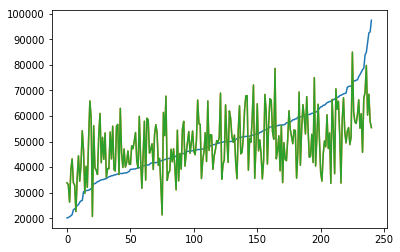

In [292]:
plt.plot(preddt)